# Exploratory Data Analysis and K Nearest Neighbors Classification

For this assignment you will perform exploratory data analysis to visualize wine dataset using Scikit Learn. And, you will explore the bias/variance trade-off by applying k-nearest neighbors classification to the Wine dataset and varying the hyperparameter k.

Documentation for Scikit Learn:
+ The top level documenation page is here: https://scikit-learn.org/stable/index.html
+ The API for the KNearestNeighborsClassifier is here: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier
+ The User Guide for KNearestNeighborsClassifier is here: https://scikit-learn.org/stable/modules/neighbors.html#classification
+ Scikit Learn provides many Jupyter notebook examples on how use the toolkit. These Jupyter notebook examples can be run on MyBinder: https://scikit-learn.org/stable/auto_examples/index.html

For more information about the Wine dataset, see this page https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html.

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from pandas import DataFrame

##  Load Wine dataset

In [2]:
wine = datasets.load_wine()
X = wine.data
y = wine.target

## Part 1 Exploratory Data Analysis

### Dataset size

In [3]:
print("Number of instances in the wine dataset:", X.shape[0])
print("Number of features in the wine dataset:", X.shape[1])
print("The dimension of the data matrix X is", X.shape)

Number of instances in the wine dataset: 178
Number of features in the wine dataset: 13
The dimension of the data matrix X is (178, 13)


In [4]:
X

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

The `y` vector length is 178. It has three unique values: 0, 1 and 2. Each value represents a kine of wine.

In [5]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

### Descriptive statistics

Show the summary table of wine data including min, max, median, and quantiles

In [6]:
y.shape

(178,)

In [7]:
dir(wine)

['DESCR', 'data', 'feature_names', 'frame', 'target', 'target_names']

In [8]:
import numpy as np
import pandas as pd
wine_df = pd.DataFrame(data= np.c_[wine['data'], wine['target']],
                     columns= wine['feature_names'] + ['target'])

In [9]:
wine_df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [10]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [11]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

### (TODO) Part 1a Draw box plots

Draw four box plots for attributes: alcohol, malic_acid, ash, alcalinity_of_ash. Use color to show the different target class.

Some links to help you:

https://seaborn.pydata.org/generated/seaborn.boxplot.html

https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.boxplot.html

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_3208\1786736078.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y=attribute, data=wine_df, palette='Set2')
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_3208\1786736078.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y=attribute, data=wine_df, palette='Set2')
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_3208\1786736078.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y=attribute, data=wine_df, palette='Set2')
C:\Users\ADMIN\AppData\Local\Temp\ipykernel

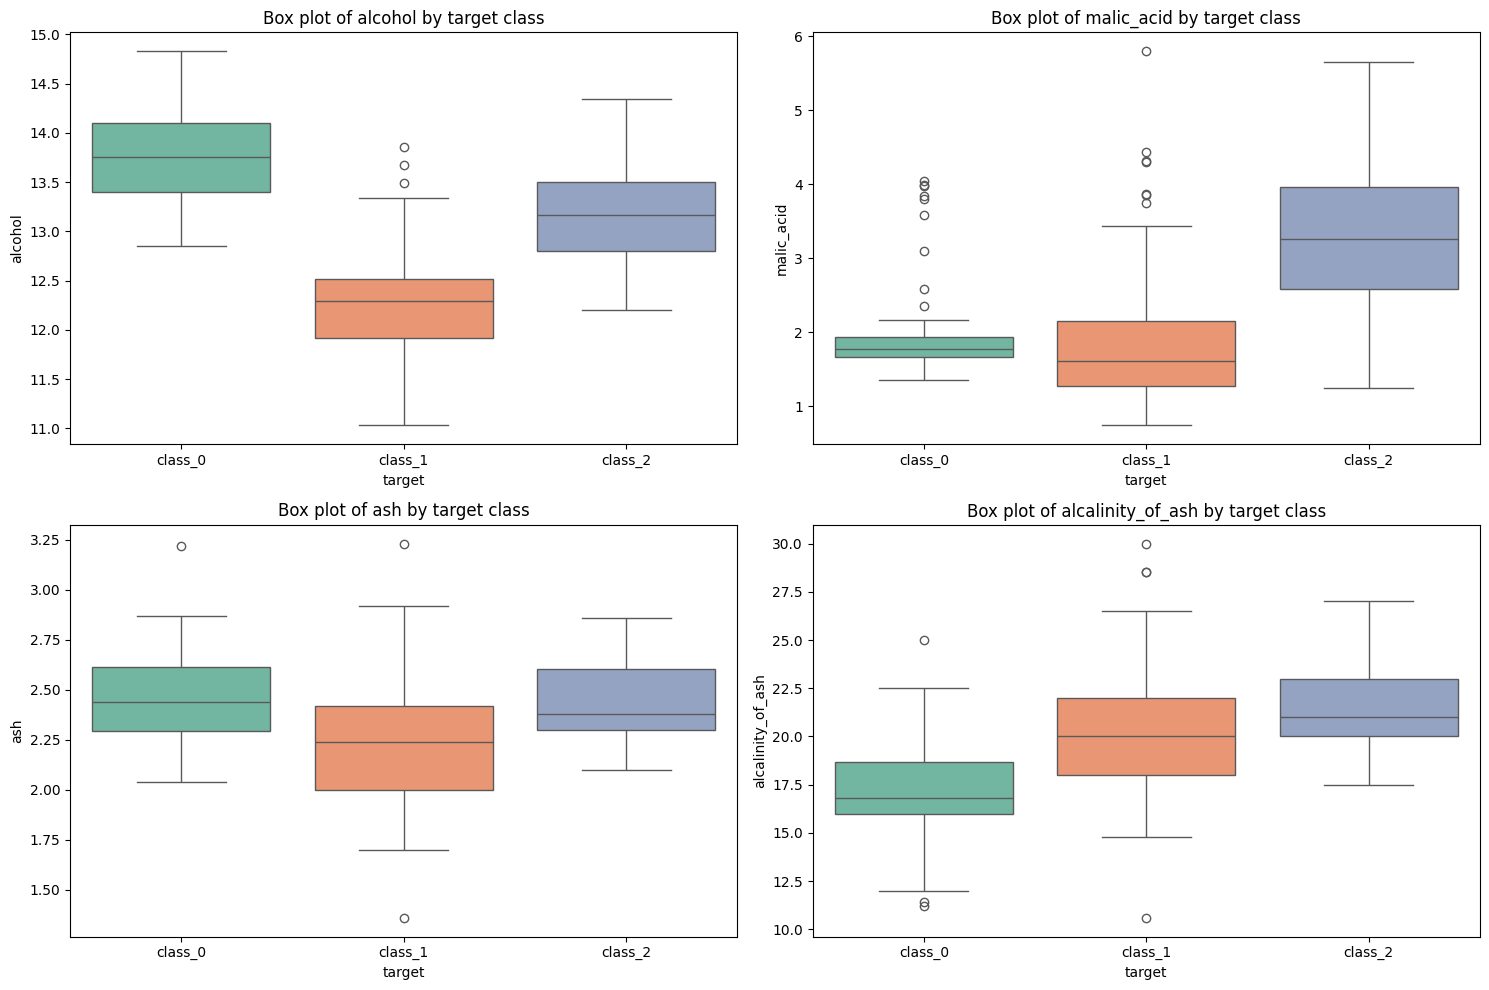

In [13]:
# List of attributes for which you want to create box plots
attributes = ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash']

# Setting up the matplotlib figure
plt.figure(figsize=(15, 10))

# Iterating through the attributes and creating a subplot for each
for i, attribute in enumerate(attributes):
    plt.subplot(2, 2, i + 1)  # Creating a subplot
    sns.boxplot(x='target', y=attribute, data=wine_df, palette='Set2')
    plt.title(f'Box plot of {attribute} by target class')
    plt.xticks(ticks=[0, 1, 2], labels=wine.target_names)  # Setting custom labels for target classes

plt.tight_layout()
plt.show()

### (TODO) Part 1b
Based on the box plots, if you were only allowed to choose one attribute which attribute would you choose? Why?

Based on the box plots for the purpose of differentiating between the target classes, I would choose alcohol. Here's a detailed interpretation of each attribute based on the box plots and the reasoning for choosing alcohol:

Alcohol:
The median of alcohol content for class_0 is the highest, followed by class_1 and class_2. This suggests that alcohol content decreases from class_0 to class_2.
The interquartile ranges (IQR) for class_1 and class_2 show some overlap, but class_0's IQR is distinct and higher, indicating that its alcohol content is consistently higher than the other classes.
There are a few outliers for class_0 and class_1, but these do not overlap with the central range of the other classes, which could indicate that these are exceptional cases rather than a common trend.

Malic Acid:
The median malic acid level for class_0 is lower than the other two, but there's a significant overlap in the IQRs for class_1 and class_2.
The number of outliers for class_0 and class_1 is greater, suggesting a higher variation within these classes for malic acid content, which may complicate classification.

Ash:
The medians for ash content are very close for all three classes, with considerable overlap in the IQRs, suggesting that ash content alone may not be a strong differentiator between the classes.

Alkalinity of Ash:
Although class_0 has a distinctly lower median compared to class_1 and class_2, the IQRs of class_1 and class_2 overlap significantly, which could make it difficult to differentiate between these two classes based on alkalinity of ash alone.

Choosing ALCOHOL as the attribute is based on the clear separation of its median value for class_0 from the other classes and the relatively higher position of its IQR, suggesting it can be a strong single predictor for differentiating at least class_0 from classes 1 and 2. The presence of some overlap between the IQRs of class_1 and class_2 is a limitation, but the overall positioning and spread of the alcohol content data for class_0 make it the best candidate for classification purposes among the given attributes.

### (TODO) Part 1c Scatter plots

Generate [scatter plots](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) using each pair of the first 4 attributes (alcohol, malic_acid, ash, alcalinity_of_ash) as axis. You should generate $6 = {4 \choose 2}$ scatter plots.

Note: use the smaller index attribute as x axis and the larger one as y axis. eg. for pair (alcohol, malic_acid), alcohol is the x axis and malic_acid is y axis.

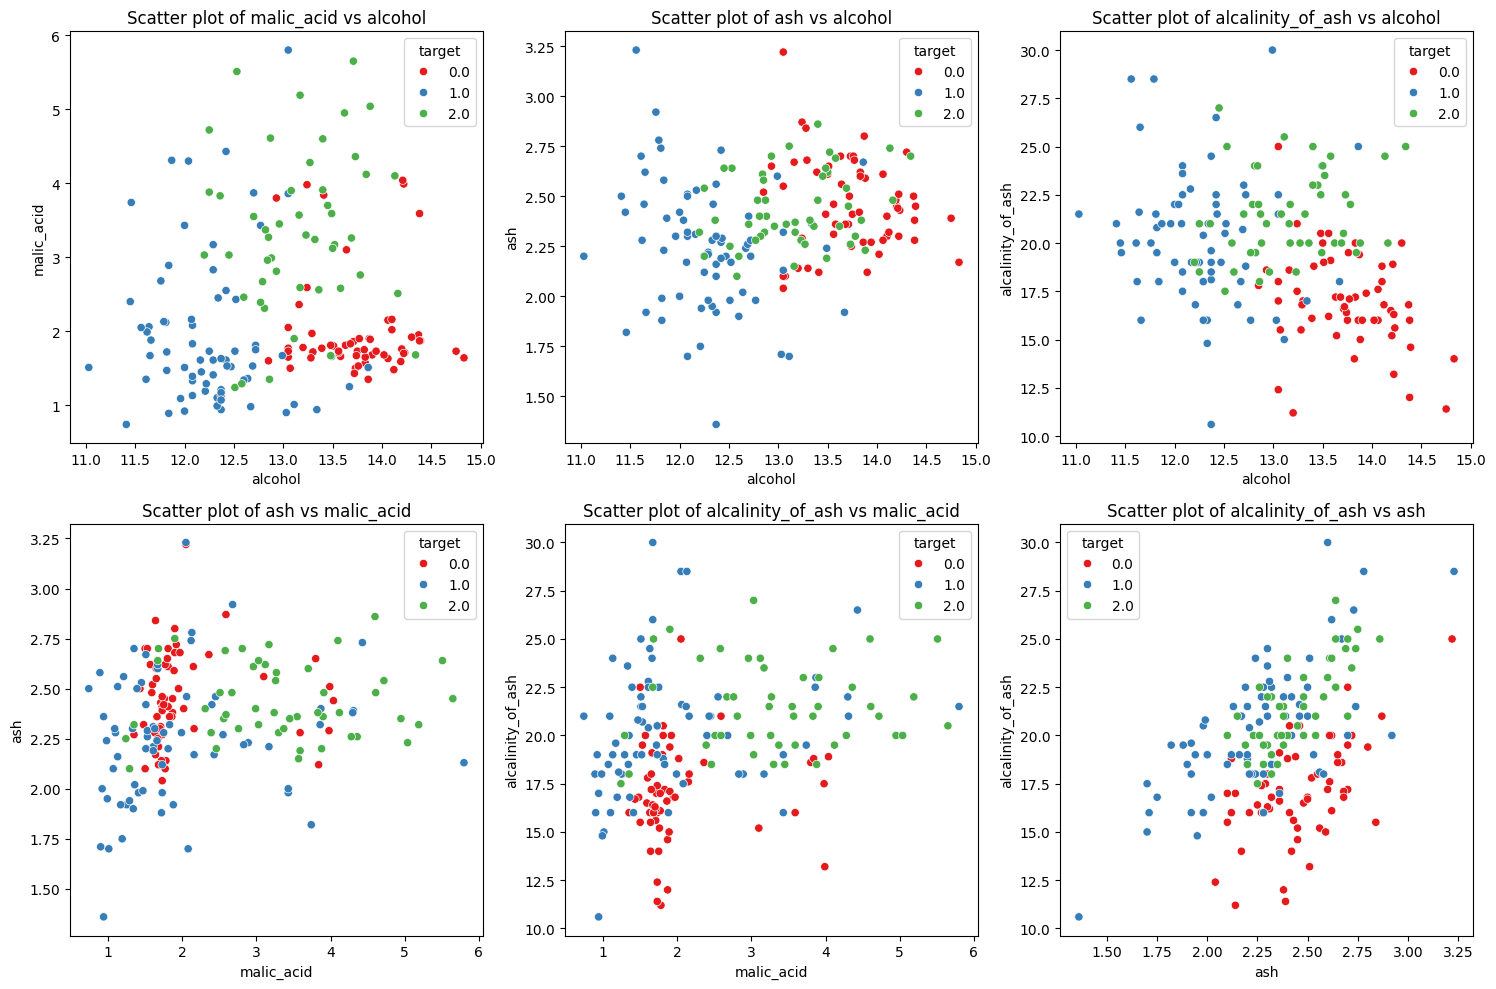

In [14]:
# Define the attributes for which to generate scatter plots
attributes = ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash']
pairs = [(attributes[i], attributes[j]) for i in range(len(attributes)) for j in range(i+1, len(attributes))]

# Set up the matplotlib figure
plt.figure(figsize=(15, 10))

# Generate scatter plots for each pair
for i, (x_attr, y_attr) in enumerate(pairs):
    plt.subplot(2, 3, i+1)
    sns.scatterplot(x=x_attr, y=y_attr, hue='target', data=wine_df, palette='Set1', legend='full')
    plt.title(f'Scatter plot of {y_attr} vs {x_attr}')
    plt.xlabel(x_attr)
    plt.ylabel(y_attr)

plt.tight_layout()
plt.show()

### (TODO) Part 1d
If you were to draw linear decision boundaries to separate the classes, which scatter plot from 1c do you think will have the least error and which the most?

By visually looking at the scatter plots we can say that:

Least Error: The scatter plot of "alcohol" vs "malic_acid" seems to show the best separation between the classes, particularly between class 0 and the others. The classes do not overlap much, and it appears that a linear decision boundary could effectively separate class 0 from classes 1 and 2 with relatively low error. There's a little more overlap between classes 1 and 2, but they're still reasonably separable.

Most Error: The scatter plot of "ash" vs "alcalinity_of_ash" appears to have the most overlap between the classes. The data points are more intermixed, and there's no clear way to draw a single linear decision boundary that would separate the three classes without incurring a high degree of misclassification.

For a linear classifier to be effective, the classes need to be linearly separable. In practice, a classifier might use a combination of attributes to achieve better separation than what is visible in any single two-dimensional scatter plot.

### (TODO) Part 1e PCA
Scatter plots using two attributes of the data are equivalent to project the four dimensional data down to two dimensions using axis-parallel projection. Principal component analysis (PCA) is a technique to linearly project the data to lower dimensions that are not necessarily axis-parallel. Use PCA to project the data down to two dimensions.

Documentation for PCA:
+ API https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA
+ User guide https://scikit-learn.org/stable/modules/decomposition.html#pca

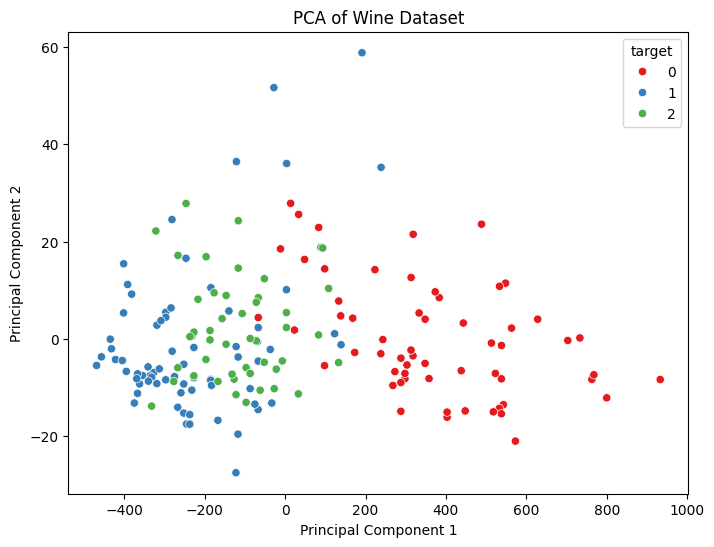

In [15]:
from sklearn.decomposition import PCA

# Performing PCA to reduce the data to two dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Creating a DataFrame for the PCA results
pca_df = pd.DataFrame(data = X_pca, columns = ['Principal Component 1', 'Principal Component 2'])
pca_df['target'] = y

# Plotting the PCA-reduced data
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Principal Component 1', y='Principal Component 2', hue='target', 
                data=pca_df, palette='Set1', legend='full')
plt.title('PCA of Wine Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='target')
plt.show()

### (TODO) Part 1f
In the case of the Wine dataset, does PCA do a better job of separating the classes?

Principal Component Analysis (PCA) is specifically designed to transform the data into a new coordinate system such that the greatest variance by any projection of the data comes to lie on the first coordinate (called the first principal component), the second greatest variance on the second coordinate, and so on. This often results in a more efficient separation of classes in the transformed space compared to the original feature space, particularly when the original features are correlated or not individually highly discriminative.

Based on the comparison between the PCA plot and the scatter plots of individual attribute pairs, as per the visual plots:

The PCA plot shows that the classes are more clearly separated along the first principal component axis, with class 0 being well-separated from classes 1 and 2, which are also distinguishable but with some overlap. The second principal component provides additional separation, especially for class 1.

When comparing this to the individual scatter plots, none of the attribute pairs provide as clear a separation between all three classes as the PCA does. The scatter plots all show more overlap between the classes than the PCA plot does. This suggests that PCA has done a better job of capturing the underlying variance in the data in a way that helps to separate the classes.

Therefore, in the case of the wine dataset, PCA appears to provide a projection that better separates the classes than any individual pair of original attributes.

## Part 2 K Nearest Neighbor

Split the dataset into train set and test set. Use 70 percent of the dataset for training, and use 30 percent for testing.

In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42)

In [17]:
print("Number of instances in the train set:", X_train.shape[0])
print("Number of instances in the test set:", X_test.shape[0])

Number of instances in the train set: 124
Number of instances in the test set: 54


### (TODO) Part 2a Training a KNN classifer

Create a KNeighborsClassifier with `n_neighbors = 3`. And, train the classifier using the train set.

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Create KNeighborsClassifier with n_neighbors=3
knn = KNeighborsClassifier(n_neighbors=3)

# Train the classifier using the training set
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

### (TODO) Part 2b Tuning hyperparameter k
As we have seen in class, hyperparameter k of the K Nearest Neighbors classification affects the inductive bias. For this part train multiple near neighbor classifier models, store the results in a DataFrame. The plot plot training error and testing error versus N/k, where N = 100 and k are given in the k_list below.

In [20]:
# List of k values
k_list = [1, 3, 5, 7, 9, 11, 13, 15, 50]

In [21]:
from sklearn.metrics import accuracy_score

N = 100

# Initialize lists to store train and test errors
train_errors = []
test_errors = []

# Train KNeighborsClassifier with different values of k and record their errors
for k in k_list:
    # Create KNeighborsClassifier with current k
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Train the classifier
    knn.fit(X_train, y_train)
    
    # Predict on the training set
    y_train_pred = knn.predict(X_train)
    
    # Predict on the test set
    y_test_pred = knn.predict(X_test)
    
    # Calculate and store the training and testing errors
    train_errors.append(1 - accuracy_score(y_train, y_train_pred))
    test_errors.append(1 - accuracy_score(y_test, y_test_pred))

# Store the results in a DataFrame
result = pd.DataFrame({
    'k': k_list,
    'N/k': [N / k for k in k_list],
    'Training Error': train_errors,
    'Testing Error': test_errors
})

result

,k,N/k,Training Error,Testing Error
0,1,100.000000,0.000000,0.203704
1,3,33.333333,0.161290,0.259259
2,5,20.000000,0.225806,0.259259
3,7,14.285714,0.209677,0.240741
4,9,11.111111,0.258065,0.277778
5,11,9.090909,0.274194,0.259259
6,13,7.692308,0.266129,0.240741
7,15,6.666667,0.274194,0.240741
8,50,2.000000,0.314516,0.203704


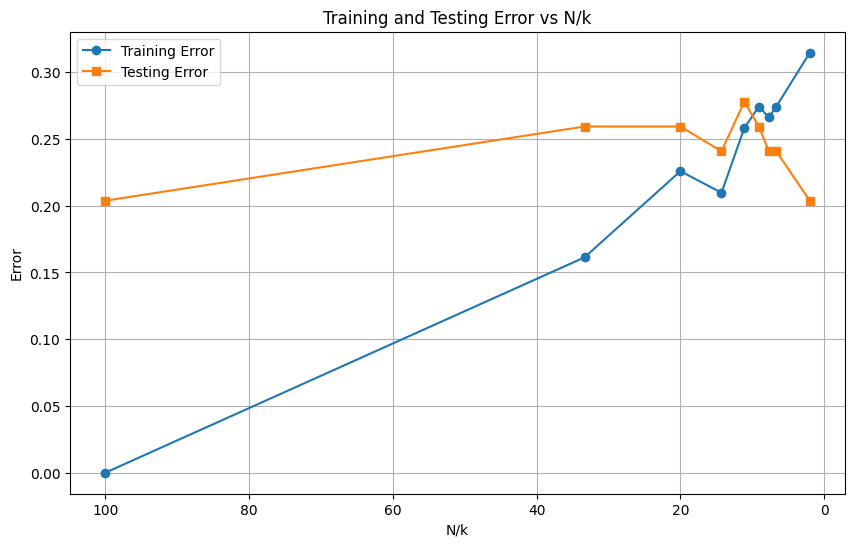

In [22]:
plt.figure(figsize=(10, 6))

# Plotting training and test errors
plt.plot(result['N/k'], result['Training Error'], label='Training Error', marker='o')
plt.plot(result['N/k'], result['Testing Error'], label='Testing Error', marker='s')

# Labeling the plot
plt.title('Training and Testing Error vs N/k')
plt.xlabel('N/k')
plt.ylabel('Error')
plt.legend()
plt.grid(True)
plt.gca().invert_xaxis()  # Invert the x-axis to show decreasing values of k

plt.show()

### (TODO) Part 2c Decision boundaries

Plot decision boundaries of K Nearest Neighbors.

Use Scikit Learn's [DecisionBoundaryDisplay](https://scikit-learn.org/stable/modules/generated/sklearn.inspection.DecisionBoundaryDisplay.html#sklearn.inspection.DecisionBoundaryDisplay) class to visualize the nearest neighbor boundaries as k is varied.

https://scikit-learn.org/stable/modules/generated/sklearn.inspection.DecisionBoundaryDisplay.html#sklearn.inspection.DecisionBoundaryDisplay

In [23]:
k_list = [1, 3, 5, 7, 9, 11, 13, 15, 50]

Simplify the problem by using only the first 2 attributes of the dataset

In [24]:
X2 = wine.data[:, :2]

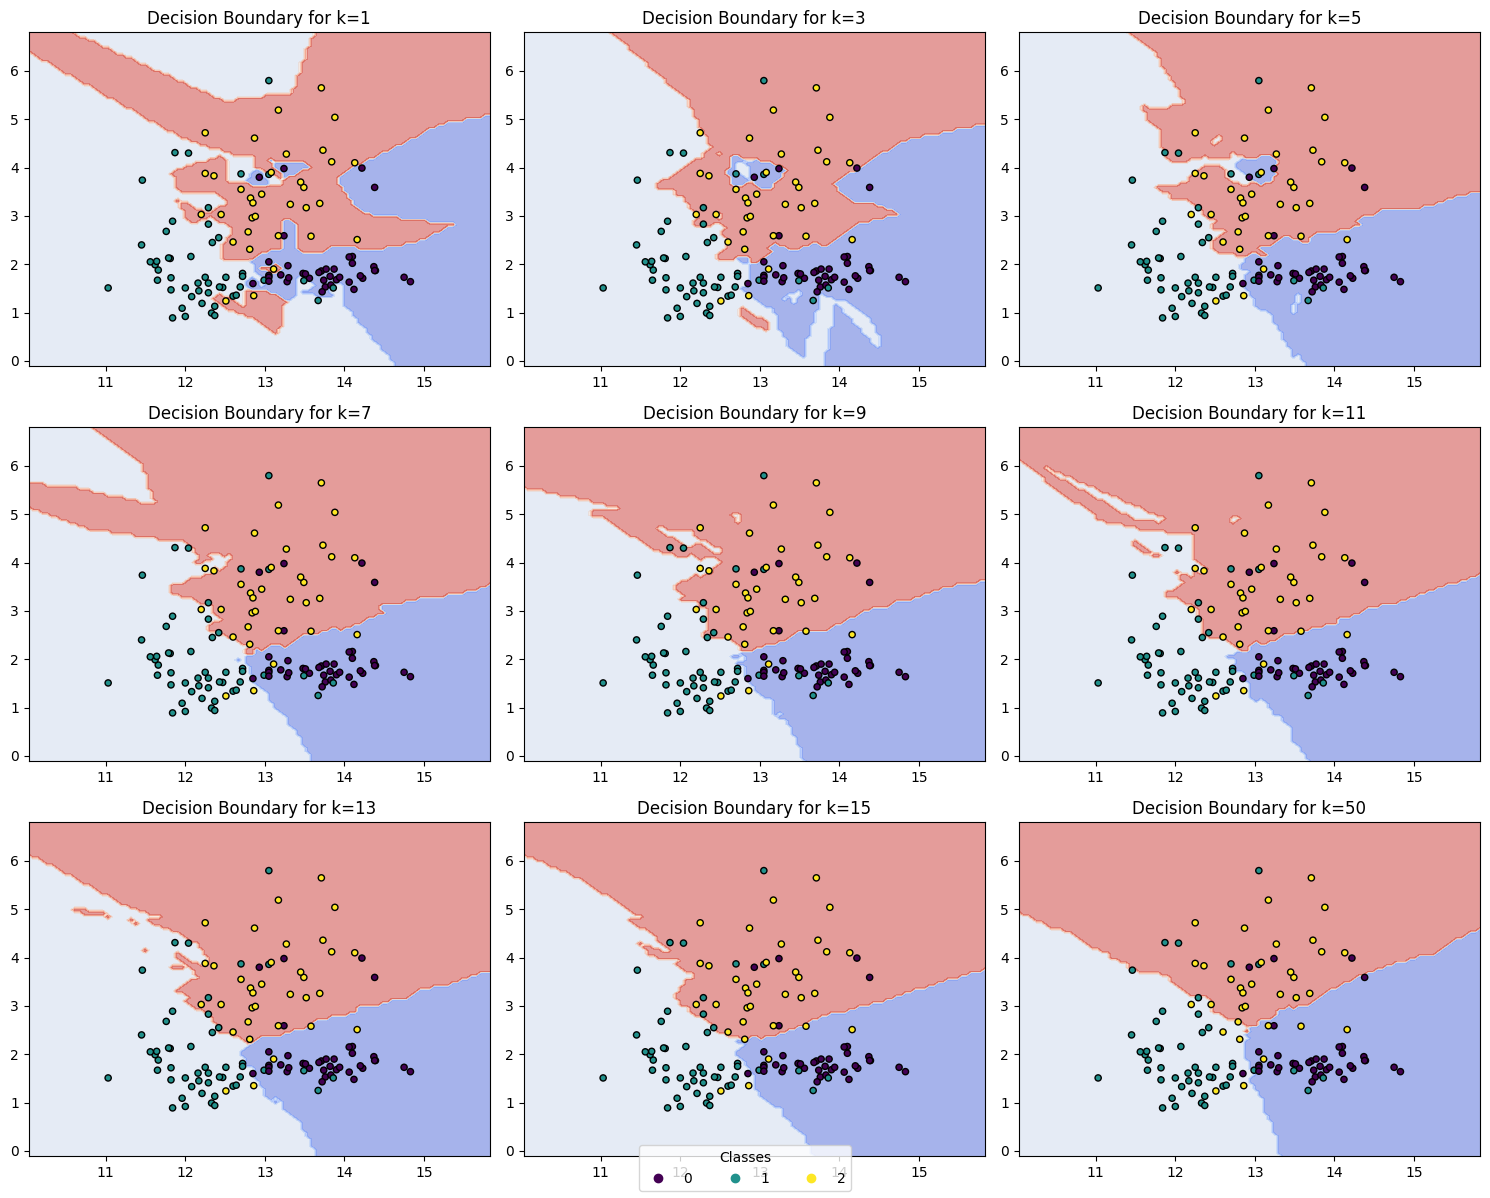

In [25]:
from sklearn.inspection import DecisionBoundaryDisplay

# Split the dataset into the training set and test set using only the first two attributes
X2_train, X2_test, y_train, y_test = train_test_split(X2, y, test_size=0.30, random_state=42)

# Set up the figure size for the plot
plt.figure(figsize=(15, 12))

# Plot the decision boundary for each value of k
for i, k in enumerate(k_list):
    # Create and fit the KNeighborsClassifier
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X2_train, y_train)
    
    # Create a subplot for each k
    ax = plt.subplot(3, 3, i + 1)
    
    # Use DecisionBoundaryDisplay to plot the decision boundary
    disp = DecisionBoundaryDisplay.from_estimator(
        knn,
        X2_train,
        cmap=plt.cm.coolwarm,
        response_method="predict",
        alpha=0.5,
        ax=ax
    )
    
    # Plot the training points
    scatter = ax.scatter(X2_train[:, 0], X2_train[:, 1], c=y_train, edgecolor='k', s=20)
    
    # Set title for the plots
    ax.set_title(f"Decision Boundary for k={k}")

# Creating a legend for the plot outside the subplots
plt.figlegend(*scatter.legend_elements(), loc='lower center', ncol=3, title="Classes")
plt.tight_layout()
plt.show()